    
# Understanding and Predicting Employee Turnover

`A case study in prescriptive analytics`
***


**"You don't build a business. You build people, and people build the business." - Zig Ziglar**
***
<!-- ![ET GIF](employee-turnover.png) -->
<img src="employee-turnover.png" style="width=500px;height:300px"/>


**"I quit..."** This is the last thing anybody wants to hear from their employees. In a sense, it’s the employees who make the company. It’s the employees who do the work. It’s the employees who shape the company’s culture. 

### We'll be covering:
- `Descriptive Analytics` - What happened?
- `Predictive Analytics` - What might happen?
- `Prescriptive Analytics` - What should we do?


***
### Objective: 
- To understand what factors contributed most to employee turnover.
- To perform clustering to find any meaningful patterns of employee traits.
- To create a model that predicts the likelihood if a certain employee will leave the company or not. 
- To create or improve different retention strategies on targeted employees. 

## Table of Contents

### The Problem
- [Why is Employee Turnover a Problem?](#problem)

### The Dataset
- [Visualizing the dataset](#dataset)

### Data Quality Check
- [Simple Inspection of Data](#datacleaning)

### Descriptive Statistics
- [Summary Statistics, Turnover Rate, Size of Data](#descriptive_statistics)
- [Correlation Matrix](#correlation_matrix)

### Exploratory Data Analysis
1. [Employee Satisfaction, Evaluation, and Project Count Distribution](#eda1)
2. [Employee Satisfaction VS Evaluation](#eda2)
3. [K Means Clustering of Employee](#clustering)
4. [Employee Satisfaction Distribution](#satisfaction)
5. [Employee Project Count Distribution](#project_count)
6. [Employee Average Monthly Hours Distribution](#avghours)

### Simple Pre-Processing
- [Pre-Processing: Categorical and Numerical Variable](#pre_processing)

### Split Train/Test Set
- [Splitting the Data into Train/Test Sets](#train_test_split)

### Class Imbalance
- [How to Treat Class Imbalance Problems](#class_imbalance)

### Resample Techniques to Treat Imbalance Data
- [Evaluate Original, Upsampled, and Downsampled Data Metrics](#resample)
- [Choose Which Sampling Technique to Use For Model - Upsampling](#upsampling)

### Model Training and Performance (5-Fold CV)
- [Logistic Regression Classifier](#lr)
- [Random Forest Classifier](#rf)
- [Gradient Boosting Classifier](#svc)

### Model Evaluation (F1 Score & ROC/AUC)
- [ROC and AUC](#roc)
- [Feature Importance](#feature_importance)

### Conclusion
- [Retention Plan](#retention_plan)


<a id='problem'></a>
# The Problem
***

One of the most common problems at work is **turnover.** 
Replacing a worker earning about **50,000 dollars** cost the company about **10,000 dollars** or 20% of that worker’s yearly income according to the Center of American Progress.


---
**Costs include:**
- Cost of off-boarding 
- Cost of hiring (advertising, interviewing, hiring)
- Cost of onboarding a new person (training, management time)
- Lost productivity (a new person may take 1-2 years to reach the productivity of an existing person)

## Example

1. Jobs (earning under 30k a year): the cost to replace a 10/hour retail employee would be **3,328 dollars**.
2. Jobs (earning 30k-50k a year) - the cost to replace a 40k manager would be **8,000 dollars**.
3. Jobs of executives (earning 100k+ a year) - the cost to replace a 100k CEO is **213,000 dollars**.

**Annual Cost of Turnover** = (Hiring + Onboarding + Development + Unfilled Time) * Employee Count * Turnover Rate

**Annual Cost of Turnover** = (\\$500 + \\$500 + \\$300 + \\$200) * 15000 * 0.24

**Annual Cost of Turnover** = \\$1500 * 3600

**Annual Cost of Turnover** = \\$5,400,000

In [1]:
# Calculating Turnover rate improvement
a = (500+500+300+200)*15000*0.24
b = (500+500+300+200)*15000*0.23

print (f"Inital Turnover Cost = ${int(a)}")
print (f"Improved Turnover Cost = ${int(b)}")
print (f"Difference = ${int(a-b)}")

Inital Turnover Cost = $5400000
Improved Turnover Cost = $5175000
Difference = $225000


<a id='problem'></a>

<a id='dataset'></a>
# Reading the Data
***

<img src="IBM.png" style="width=900px;height:400px"/>

In [2]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('HR_comma_sep.csv.txt')

In [4]:
# Examine the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Rename Columns
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [6]:
df.shape

(14999, 10)

In [7]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [79]:
round(df.turnover.value_counts(1), 2)

0    0.76
1    0.24
Name: turnover, dtype: float64

<img src="employee_turnover.png" style="width=900px;height:600px"/>

In [ ]:
plt.figure(figsize=(12,8))
turnover = df.turnover.value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16);

<a id='datacleaning'></a>
# Data Quality Check
***

In [10]:
# Can you check to see if there are any missing values in our data set
df.isnull().any()

satisfaction           False
evaluation             False
projectCount           False
averageMonthlyHours    False
yearsAtCompany         False
workAccident           False
turnover               False
promotion              False
department             False
salary                 False
dtype: bool

In [12]:
# Check the type of our features. Are there any data inconsistencies?
df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
department              object
salary                  object
dtype: object

<a id='descriptive_statistics'></a>
# Exploratory Data Analysis
***

In [13]:
# Display the statistical overview of the employees
round(df.describe(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [14]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover). What do you notice between the groups?
turnover_Summary = df.groupby('turnover')

In [15]:
round(turnover_Summary.mean(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [16]:
round(turnover_Summary.std(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.22,0.16,0.98,45.68,1.56,0.38,0.16
1,0.26,0.20,1.82,61.20,0.98,0.21,0.07


<a id='correlation_matrix'></a>
### Correlation Matrix

<img src="heatmap.png" style="width=900px;height:800px"/>

In [17]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
corr = df.corr()
corr

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.title('Heatmap of Correlation Matrix');

<a id='eda1'></a>
# EDA 1. 
## Distribution of Satisfaction, Evaluation, and Project Count

<img src="Employee Satisfaction.png" style="width=800px;height:500px"/>

In [ ]:
# Plot the distribution of Employee Satisfaction, Evaluation, and Project Count. What story can you tell?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(16, 8))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count');

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count');

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count');

<a id='eda2'></a>
# EDA 2.
## Satisfaction VS Evaluation

<img src="satisfaction_vs_evaluation.png" style="width=800px;height:500px"/>

<img src="clusters.png" style="width=800px;height:500px"/>

`There are 3 distinct clusters for employees who left the company`
 
**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job. 
 - **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
 - **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. 
 - **Question:** Could this cluser mean that employees left because they found another job opportunity?

In [ ]:
plt.figure(figsize=(15,10))
sns.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=False, hue='turnover') # Color by turnover value
plt.title('Satisfaction VS Evaluation');

<a id='clustering'></a>
##  K-Means Clustering of Employee Turnover
***

**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee 

**Cluster 3 (Green):** Hard-working and Happy Employee 

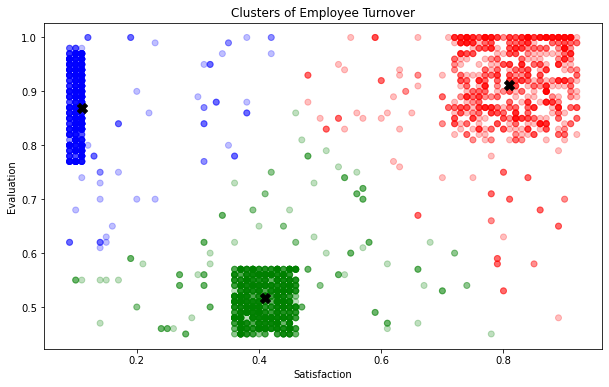

In [21]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")

plt.show();

<a id='satisfaction'></a>
### EDA 3. Employee Satisfaction

<img src="Employee Satisfaction Distribution.png" style="width=800px;height:500px"/>

There is a **tri-modal** distribution for employees that turnovered
- Employees who had really low satisfaction levels **(0.2 or less)** left the company more
- Employees who had low satisfaction levels **(0.3~0.5)** left the company more
- Employees who had really high satisfaction levels **(0.7 or more)** left the company more

In [ ]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(20,10))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover');

<a id='project_count'></a>
# EDA 4. Employee Project Count 

<img src="projectCount.png" style="width=800px;height:500px"/>

- More than half of the employees with **2, 6 and 7** projects left the company
- Majority of the employees who did not leave the company had **3,4, and 5** projects
- All of the employees with **7** projects left the company
- There is an increase in employee turnover rate as project count increases

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent");

<a id='department'></a>
# EDA 5. Employee Department Distribution

<img src="Department Distribution.png" style="width=900px;height:700px"/>

In [24]:
hrleft = df[df['turnover']==1]

hrleft = pd.DataFrame(hrleft.department.value_counts()).reset_index()
hrstay = pd.DataFrame(df.department.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"department_x":'left', "department_y":'stay', "index":'department' })
hr_merge

,department,left,stay
0,sales,1014,4140
1,technical,697,2720
2,support,555,2229
3,IT,273,1227
4,hr,215,739
5,accounting,204,767
6,marketing,203,858
7,product_mng,198,902
8,RandD,121,787
9,management,91,630


In [ ]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="stay", y='department', data=hr_merge,
            label="Total", color="b")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="left", y="department", data=hr_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True);

<a id='avghours'></a>
# EDA 6. Average Monthly Hours

**Summary:** 
 - A bi-modal distribution for employees that turnovered 
 - Employees who had less hours of work **(~150hours or less)** left the company more
 - Employees who had too many hours of work **(~250 or more)** left the company 
 - Employees who left generally were **underworked** or **overworked**.


<img src="AverageMonthly Hours.png" style="width=600px;height:400px"/>

In [ ]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(18, 8))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover');

<a id='pre_processing'></a>
# Pre-processing 
***

- Apply **get_dummies()** to the categorical variables.
- Seperate categorical variables and numeric variables, then combine them.

In [27]:
cat_var = ['department','salary','turnover','promotion']
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident']
categorical_df = pd.get_dummies(df[cat_var], drop_first=True, dummy_na=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,turnover,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,...,department_nan,salary_low,salary_medium,salary_nan,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.37,0.52,2,159,3,0


In [28]:
new_df.shape

(14999, 21)

<a id='train_test_split'></a>
# Split Train/Test Set
***

Let's split our data into a train and test set. We'll fit our model with the train set and leave our test set for our last evaluation.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [30]:
# Create the X and y set
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

<a id='class_imbalance'></a>
# Class Imbalance

### Employee Turnover Rate: 24%

In [80]:
round(df.turnover.value_counts(1), 2)

0    0.76
1    0.24
Name: turnover, dtype: float64

<img src="https://miro.medium.com/max/1240/1*yYMSLDHkxY_4OkPqQt7S0g.png" style="width=800px;height:600px"/>

# How to Treat Imbalanced Datasets

There are many ways of dealing with imbalanced data. We will focus in the following approaches:

1. Oversampling - `SMOTE`
2. Upsampling & Downsampling - `sklearn.utils.resample`

<img src="https://miro.medium.com/max/1400/1*GJY7UnJ4WCzqgtrfkCvkdA.png" style="width=500px;height:300px"/>

In [32]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)
X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

In [33]:
print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (11999, 20) (11999,)
Upsampled shape: (18284, 20) (18284,)
SMOTE sample shape: (18284, 20) (18284,)
Downsampled shape: (5714, 20) (5714,)


<a id='upsampling'></a>
# Choose Which Sampling Technique to Use For Model
***

### Apply 10-Fold Cross Validation for Logistic Regression
#### Train on Original, Upsampled, SMOTE, and Downsampled Data

**Objective**:Train our Logistic Regression Model to our **original, upsampled, and downsampled data** to see which performs best. 

**Resut:**
- **Original Sample**: F1 Score 44.96%
- **Upsample:** F1 Score 77.93%
- **SMOTE:** F1 Score 78.8%
- **Downsample:** F1 Score 77.85%

**SMOTE gives us the best performance**

## Upsample
You randomly resample the minority class to create new data. 

## SMOTE
You use the nearest neighbors of the minority observations to create new synthetic data

## Downsample
You remove some samples of the majority class

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [35]:
# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "Downsampled": (X_train_d, y_train_d),
                "SMOTE":(x_train_sm, y_train_sm)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), 
                                 methods_data[method][0], 
                                 methods_data[method][1], 
                                 cv=5, 
                                 scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
 

# cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

The best F1 Score for Original data:
0.4915813541254518
The best F1 Score for Upsampled data:
0.7658953577236598
The best F1 Score for Downsampled data:
0.7733963399170387
The best F1 Score for SMOTE data:
0.7835500386973869


# Model Training and Performance (5-Fold CV)
***

#### We're training 3 models:

1. Logistic Regression Classifier
2. Random Forest Classifier
3. Gradient Boosting Classifier

<a id='lr'></a>
## Logistic Regression Classifier

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr = lr.fit(x_train_sm, y_train_sm)
lr

LogisticRegression()

### Apply 5-Fold Cross Validation on Logistic Regression

In [82]:
lr_result = cross_val_score(lr, x_train_sm, y_train_sm, cv=5, scoring='f1')
lr_result.mean()

0.7869051643472971

### Logistic Regression Classifier AUC  (0.77)

In [36]:
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.77
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2286
           1       0.51      0.79      0.62       714

    accuracy                           0.77      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.77      0.78      3000



<a id='rf'></a>
# Random Forest Classifier 

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()
rf = rf.fit(x_train_sm, y_train_sm)
rf

RandomForestClassifier()

### Apply 5-Fold Cross Validation on Random Forest

In [86]:
rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')
rf_result.mean()

0.9774930045363284

### Random Forest Classifier AUC (0.98)

In [38]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



<a id='svc'></a>
# Gradient Boosting Classifier


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()  
gbc = gbc.fit(x_train_sm,y_train_sm)
gbc

GradientBoostingClassifier()

### Apply 5-Fold Cross Validation on Gradient Boosting Classifier

In [40]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

0.9583186379021547

### Gradient Boosting Classifier AUC  (0.96)

In [41]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.96
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.91      0.94      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



# Model Evaluation (F1 Score & ROC/AUC)

<a id='roc'></a>
# ROC Graph

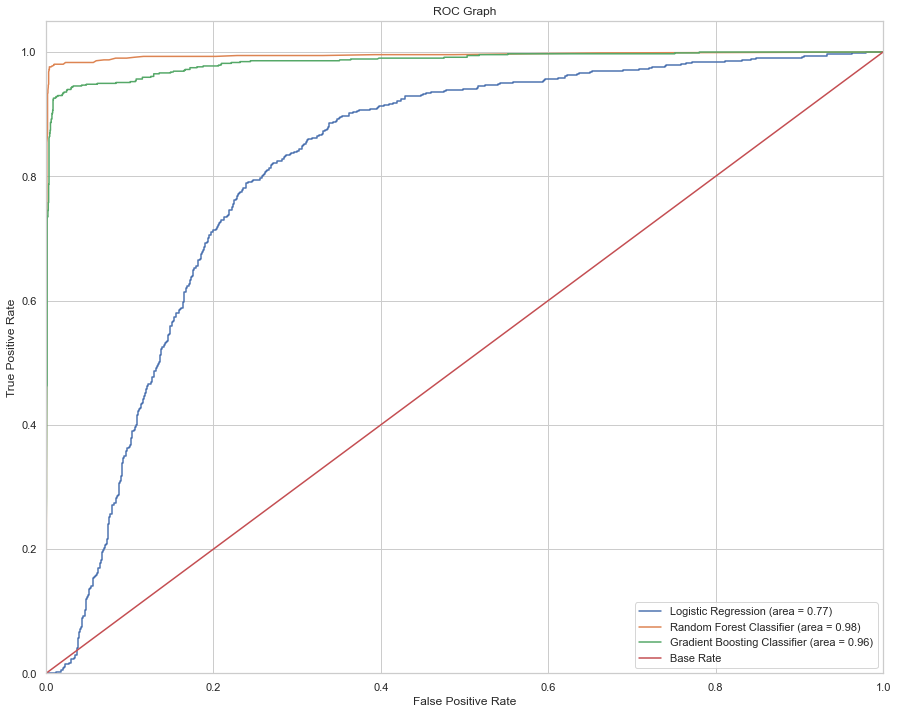

In [42]:
# Create ROC Graph
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure(figsize=(15,12))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show();

In [43]:
# Confusion Matrix for Logistic Regresion
confusion_matrix(y_test, lr.predict(X_test))

array([[1741,  545],
       [ 153,  561]], dtype=int64)

In [44]:
# Confusion Matrix for GBC
confusion_matrix(y_test, gbc.predict(X_test))

array([[2220,   66],
       [  43,  671]], dtype=int64)

In [45]:
# Confusion Matrix for Random Forest
confusion_matrix(y_test, rf.predict(X_test))

array([[2264,   22],
       [  15,  699]], dtype=int64)

# Recall or Precision?
***
It depends on how much cost/weight you want on your two types of errors: (1) **False Positives** or (2) **False Negatives**

We want our machine learn model to capture as much of the minority class as possible (turnover group). Our objective is to catch ALL of the highly probable turnover employee at the risk of flagging some low-risk non-turnover employee.

- Consider employee turnover domain where an employee is given treatment by Human  Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth. 


- Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire. 


- Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly. 


**Optimize Recall When:**
- You want to limit **false negatives**
- You will get more False Positives
- FN > FP
- Example: Predicting Cancer Patients or Credit Card Fraud

**Optimize Precision When:**
- You want to limit **false positives**
- FP > FN
- Example: Spam VS Not Spam

<a id='feature_importance'></a>
# Feature Importance

In [47]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train_sm.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction,0.274598
1,yearsAtCompany,0.224694
2,averageMonthlyHours,0.164442
3,projectCount,0.146819
4,evaluation,0.129561
5,workAccident,0.021490
6,salary_low,0.007172
7,salary_medium,0.004881
8,department_sales,0.004571
9,department_technical,0.004229


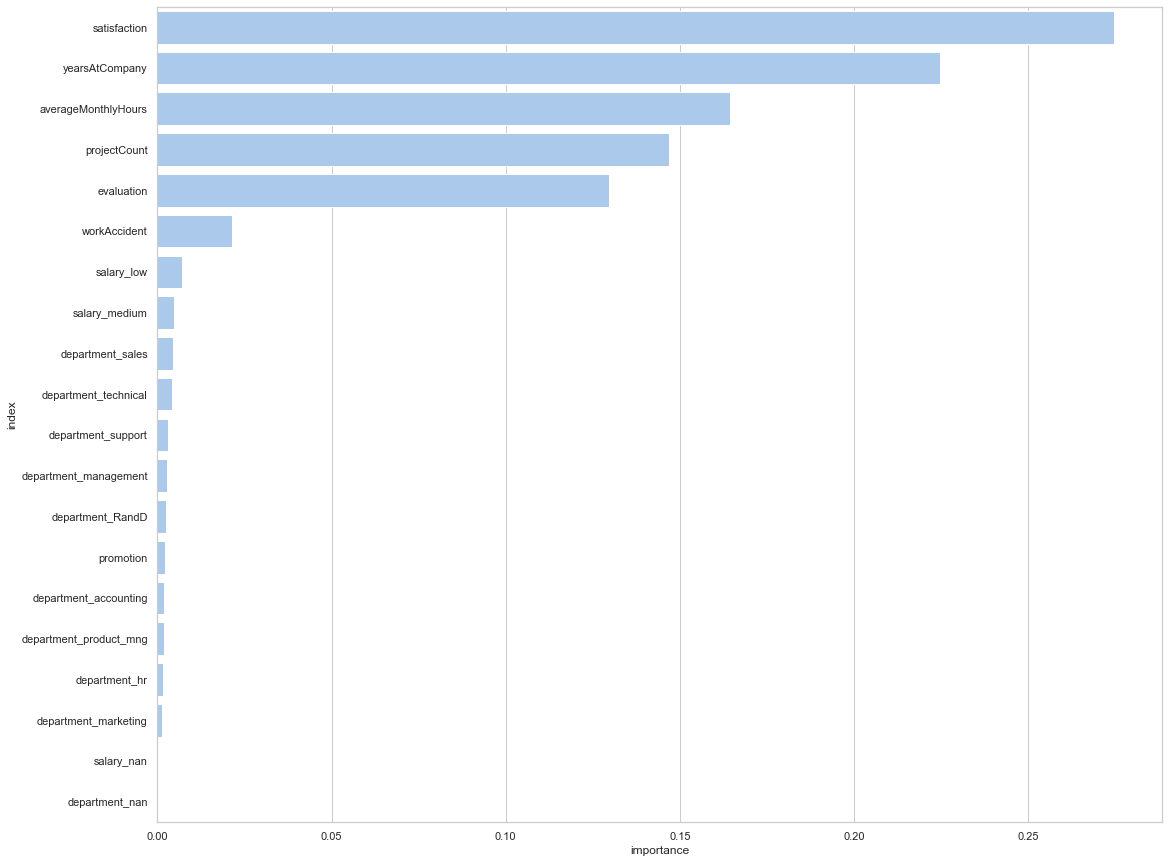

In [88]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b");

# Apply Random Noise to Feature Importance

<AxesSubplot:xlabel='importance', ylabel='index'>

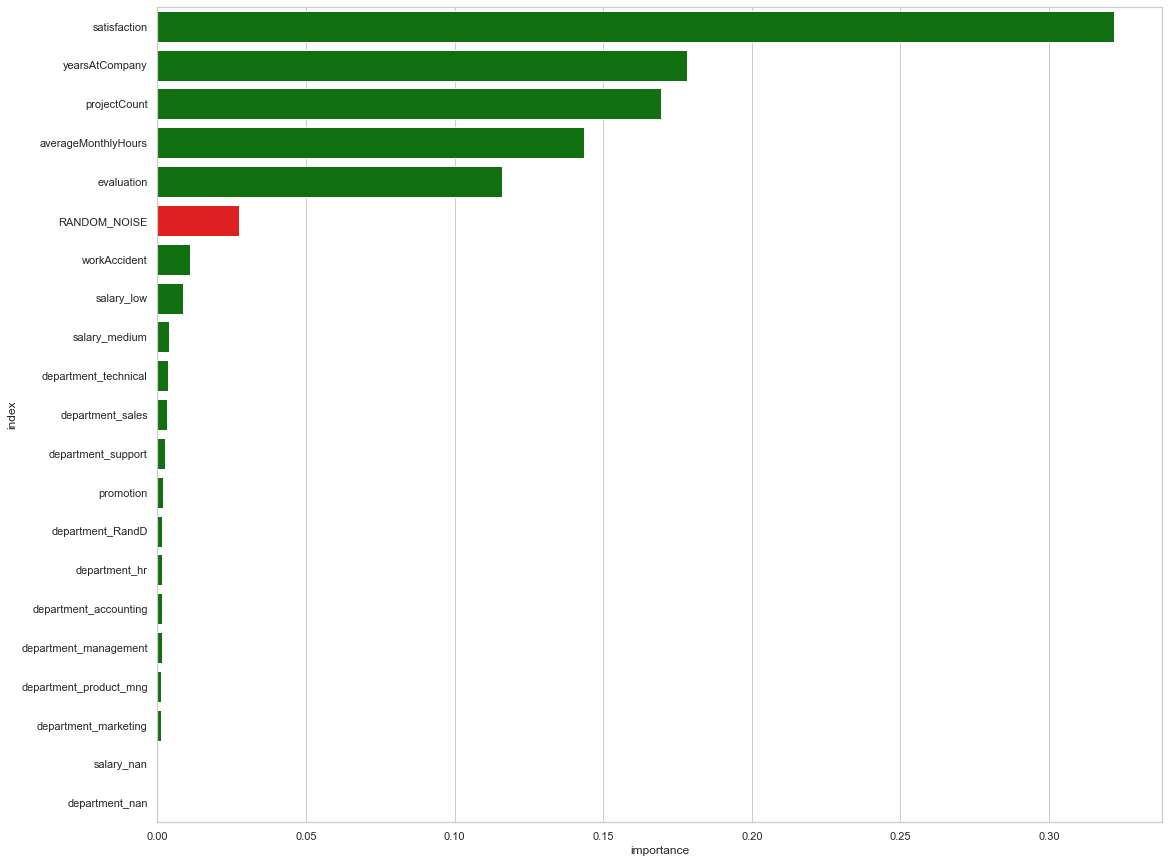

In [89]:
# Apply Random Noise to data set
X_train_rnoise = pd.DataFrame(X_train)
X_train_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, X_train_rnoise.shape[0])

# Fit Random Forest to DataSet
rf_random = RandomForestClassifier()
rf_random = rf_random.fit(X_train_rnoise, y_train)

# Get Feature Importances
feature_importances_random = pd.DataFrame(rf_random.feature_importances_, index = X_train_rnoise.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()

# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))


clrs = ['red' if (x == 5 ) else 'green' for x in feature_importances_random.index.values ]

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances_random, label="Total",  palette=clrs)

<a id='retention_plan'></a>
# Retention Plan

******

**Reference:** http://rupeshkhare.com/wp-content/uploads/2013/12/Employee-Attrition-Risk-Assessment-using-Logistic-Regression-Analysis.pdf

Since this model is being used for people, we should refrain from soley relying on the output of our model. Instead, we can use it's probability output and design our own system to treat each employee accordingly. 

1.	**Safe Zone (Green)** – Employees within this zone are considered safe. 
2.	**Low Risk Zone (Yellow)** – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.
3.	**Medium Risk Zone (Orange)** – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly. 
4.	**High Risk Zone (Red)** – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately. 

<!-- ![png](employee-retention.png) -->
<img src="employee-retention.png" style="width=800px;height:600px"/>

In [55]:
rf.predict_proba(X_test)[175:185]

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.81, 0.19],
       [0.82, 0.18],
       [0.01, 0.99],
       [0.23, 0.77],
       [0.98, 0.02]])

# Conclusion

******

## What to Optimize
**Binary Classification**: Turnover V.S. Non Turnover

**Instance Scoring**: Likelihood of employee responding to an offer/incentive to save them from leaving.

**Need for Application**: Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. 
We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances. 

-------------
 
 **Solution 1:** 
 - We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
 - OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.

**Solution 2:** 
 - Develop learning programs for managers, then use analytics to gauge their performance and measure progress.
 - Be a good coach. Empower the team and do not micromanage
 - Express interest for team member success
 - Have clear vision / strategy for team
 - Help team with career development    


# Selection Bias
***

- One thing to note about this dataset is the turnover feature. We don't know if the employees that left are interns, contractors, full-time, or part-time. These are important variables to take into consideration when performing a machine learning algorithm to it. 

- Another thing to note down is the type of bias of the evaluation feature. Evaluation is heavily subjective, and can vary tremendously depending on who is the evaluator. If the employee knows the evaluator, then he/she will probably have a higher score. 